In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import pickle

In [77]:
df = pd.read_csv('modeldata.csv')

In [78]:
df

,is_transfer,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,0,229133.94,15325.00,0.0,5083.00,51513.44,0,0
1,0,181.00,181.00,0.0,21182.00,0.00,0,1
2,1,181.00,181.00,0.0,0.00,0.00,0,1
3,1,215310.30,705.00,0.0,22425.00,0.00,0,0
4,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...
2770404,1,6311409.28,6311409.28,0.0,0.00,0.00,0,1
2770405,0,339682.13,339682.13,0.0,0.00,339682.13,0,1
2770406,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,1
2770407,1,850002.52,850002.52,0.0,0.00,0.00,0,1


In [81]:
features = ['is_transfer', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']

In [82]:
X = df[features]
y = df['isFraud']
## Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3000)

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

treeModel = DecisionTreeClassifier(min_samples_split=3).fit(X_train, y_train)
treePred = treeModel.predict(X_test)

cm = confusion_matrix(y_test, treePred)
print("Confusion Matrix")
print(cm)
print()
print("TN (True Negative) predictions:", cm[0][0])
print("FP (False Positive) predictions:", cm[0][1])
print("FN (False Negative) predictions:", cm[1][0])
print("TP (True Positive) predictions:", cm[1][1])

Confusion Matrix
[[690352    198]
 [   261   1792]]

TN (True Negative) predictions: 690352
FP (False Positive) predictions: 198
FN (False Negative) predictions: 261
TP (True Positive) predictions: 1792


In [85]:
classification_report = classification_report(y_test, treePred)
print("classification Report")
print(classification_report)
print()

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690550
           1       0.90      0.87      0.89      2053

    accuracy                           1.00    692603
   macro avg       0.95      0.94      0.94    692603
weighted avg       1.00      1.00      1.00    692603




In [86]:
#accuracy and error of testing set
accuracy = accuracy_score(y_test, treePred)
error = 1-accuracy
print()
print("Accuracy=",accuracy)
print("Error=",error)

#Precsion, Recall, and F1_score
precision = precision_score(y_test, treePred)
recall = recall_score(y_test, treePred)
f1 = f1_score(y_test, treePred)
print()
print("Precision=", precision)
print("Recall=", recall)
print("F1_score=", f1)


Accuracy= 0.9993372826857522
Error= 0.0006627173142478293

Precision= 0.9005025125628141
Recall= 0.8728689722357525
F1_score= 0.8864704427405392


### Plot correlations and feature importances

In [87]:
importances={}

In [88]:
ft_importances = treeModel.feature_importances_

In [90]:
for f,i in zip(features,ft_importances):
    importances[f] = i

In [93]:
importances

{'is_transfer': 0.2096622536861184,
 'amount': 0.273135475448767,
 'oldbalanceOrg': 0.31894443015872326,
 'newbalanceOrig': 0.014082658541489775,
 'oldbalanceDest': 0.09773024906585757,
 'newbalanceDest': 0.086444933099044}

In [97]:
from seaborn import barplot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


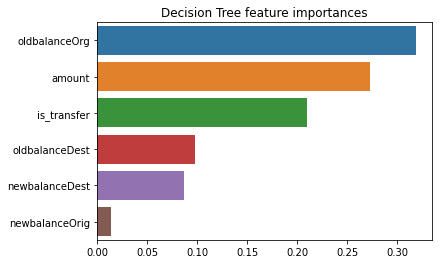

In [116]:
importances = dict(sorted(importances.items(), key=lambda item: abs(item[1]),reverse=True))

plot = barplot(list(importances.values()),list(importances.keys())).set(title="Decision Tree feature importances")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


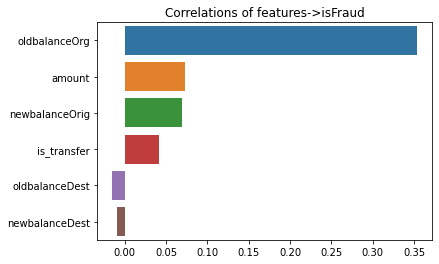

In [115]:
record_corr  = {}
for i in range(pd.DataFrame(X_train).shape[1]):
    record_corr[features[i]] = np.corrcoef(pd.DataFrame(X_train).iloc[:,i],y_train)[1][0]

#Sort list descending
record_corr = dict(sorted(record_corr.items(), key=lambda item: abs(item[1]),reverse=True))

plot = barplot(list(record_corr.values()),list(record_corr.keys())).set(title="Correlations of features->isFraud")

### Save model as pickle file

In [117]:
filename = 'DTFraudModel'
pickle.dump(treeModel, open(filename, 'wb'))